# 국민체육진흥원의 체력100에 따른 개인 맞춤형 건강등급 예측 알고리즘
#### by F-T AIsland from Tech-IT AI school 9th

##### 문화빅데이터 플랫폼에 저장된 체력측정 및 운동처방 종합 데이터를 사용함
##### 데이터 기간 : 2013.03 ~ 2022.12
##### 데이터 출처 : https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=b3924850-aa65-11ec-8ee4-95f65f846b27


### 1. 모듈 및 데이터 불러오기
    - 2013년 3월부터 2022년 12월까지 118개의 csv파일을 활용

In [80]:
# 모듈 임포트

import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats
from statsmodels.formula.api import ols, glm

from prophet import Prophet

In [3]:
# 특정 디렉토리에 있는 .csv 확장자 파일 모두 불러오기
files = glob.glob(r'C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\*.csv')

In [4]:
# 불러온 파일 확인하기
for file in files:
    print(file)

C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201303.csv
C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201304.csv
C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201305.csv
C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201306.csv
C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201307.csv
C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201308.csv
C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201309.csv
C:\Users\seungjoo\Documents\Dev_ws\project\data_project\raw_data\KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201310.csv
C:\Users\seungjoo\Documents\Dev_

In [5]:
# 불러온 파일을 raw_data 파일 하나로 합치기
raw_data = pd.DataFrame()

for file in files:
    new_data = pd.read_csv(file, parse_dates=['MESURE_DE'])  # MESURE_DE를 datetime으로 처리해서 불러오기
    raw_data = pd.concat([raw_data, new_data])


### 2. 데이터 기본정보 확인하기
    - 총 데이터는 1727278행 51열이 있음

In [6]:
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1727278 entries, 0 to 10952
Data columns (total 51 columns):
 #   Column                Dtype         
---  ------                -----         
 0   MBER_SEQ_NO_VALUE     object        
 1   MESURE_SEQ_NO         int64         
 2   CNTER_NM              object        
 3   AGRDE_FLAG_NM         object        
 4   MESURE_PLACE_FLAG_NM  object        
 5   MESURE_AGE_CO         float64       
 6   INPT_FLAG_NM          object        
 7   CRTFC_FLAG_NM         object        
 8   MESURE_DE             datetime64[ns]
 9   SEXDSTN_FLAG_CD       object        
 10  MESURE_IEM_001_VALUE  float64       
 11  MESURE_IEM_002_VALUE  float64       
 12  MESURE_IEM_003_VALUE  float64       
 13  MESURE_IEM_004_VALUE  float64       
 14  MESURE_IEM_005_VALUE  float64       
 15  MESURE_IEM_006_VALUE  float64       
 16  MESURE_IEM_007_VALUE  float64       
 17  MESURE_IEM_008_VALUE  float64       
 18  MESURE_IEM_009_VALUE  float64       
 19  MESURE_

,MESURE_SEQ_NO,MESURE_AGE_CO,MESURE_DE,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_003_VALUE,MESURE_IEM_004_VALUE,MESURE_IEM_005_VALUE,MESURE_IEM_006_VALUE,MESURE_IEM_007_VALUE,...,MESURE_IEM_032_VALUE,MESURE_IEM_033_VALUE,MESURE_IEM_034_VALUE,MESURE_IEM_035_VALUE,MESURE_IEM_036_VALUE,MESURE_IEM_037_VALUE,MESURE_IEM_038_VALUE,MESURE_IEM_039_VALUE,MESURE_IEM_040_VALUE,MESURE_IEM_041_VALUE
count,1.727278e+06,1.727271e+06,1727278,1.727022e+06,1.727044e+06,1.684418e+06,961835.000000,1.716344e+06,1.716331e+06,1.724414e+06,...,83532.000000,83400.000000,28330.000000,83360.000000,267278.000000,267257.000000,27108.000000,27108.000000,175926.000000,29615.000000
mean,1.685218e+00,3.424685e+01,2018-10-19 17:33:40.965241088,1.644485e+02,6.365931e+01,2.664808e+01,79.868808,7.641012e+01,1.246060e+02,2.952428e+01,...,113.308014,136.425564,151.092164,38.844728,114.241905,39.880124,50.259706,49.988653,0.543558,0.722687
min,1.000000e+00,0.000000e+00,2013-03-05 00:00:00,5.000000e+01,1.000000e+01,0.000000e+00,0.000000,0.000000e+00,-8.400000e+01,-9.999000e+03,...,0.000000,0.000000,0.000000,-12106.000000,0.000000,-2347.200000,0.000000,-12.700000,0.000000,0.000000
25%,1.000000e+00,1.600000e+01,2017-02-06 00:00:00,1.574000e+02,5.408000e+01,2.000000e+01,73.000000,7.000000e+01,1.160000e+02,2.170000e+01,...,103.000000,124.000000,140.000000,34.200000,98.000000,35.400000,48.000000,47.800000,0.321000,0.427000
50%,1.000000e+00,2.300000e+01,2018-10-19 00:00:00,1.642000e+02,6.198000e+01,2.680000e+01,79.900000,7.700000e+01,1.220000e+02,2.760000e+01,...,113.000000,134.000000,155.000000,38.300000,113.000000,39.700000,50.300000,50.000000,0.355000,0.501000
75%,2.000000e+00,5.400000e+01,2020-11-19 00:00:00,1.717000e+02,7.160000e+01,3.310000e+01,86.700000,8.200000e+01,1.330000e+02,3.700000e+01,...,123.000000,146.000000,167.000000,43.600000,129.000000,44.700000,52.900000,52.600000,0.395000,0.564000
max,5.700000e+01,1.770000e+02,2022-12-31 00:00:00,2.100000e+02,1.843000e+02,4.032000e+03,24324.000000,7.515400e+04,8.810100e+04,2.343200e+04,...,1891.000000,66665.000000,2209.000000,198.000000,9800.000000,1646.100000,106.200000,90.800000,340.000000,605.000000
std,1.763503e+00,2.202178e+01,NaN,9.573697e+00,1.348647e+01,1.253280e+01,31.953458,6.079308e+01,7.398774e+01,2.398202e+01,...,18.414024,305.109143,33.682298,46.088040,31.228407,13.451548,6.457871,6.307832,5.388264,8.114909


### 3. 데이터 전처리
#### 3.1 불필요한 행 제거 및 결측치 처리
    - 불필요한 정보인 회원번호, 측정회원번호, 입력구분명, 측정장소구분명은 제거
    - 향후 서비스 이용자가 스스로 측정 불가한 측정항목 제거(3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41)
    - 기본정보를 토대로 결측치가 많은 측정값은(24) 제거
    - 중요 변수인 나이와 운동처방에 결측이 있는 경우, 해당되는 행 제거
    - 성인데이터 중, 등급이 '금상', '은상', '동상'인 경우 행 제거
    - 성별(남:0, 여:1), 운동등급(1등급:1, 2등급:2, 3등급:3, 참가증:4)로 인코딩

In [7]:
# 회원일련번호값, 측정일련번호, 입력구분명 제거
raw_data.drop(['MBER_SEQ_NO_VALUE', 'MESURE_SEQ_NO', 'MESURE_PLACE_FLAG_NM', 'INPT_FLAG_NM'], axis = 1, inplace=True)

In [8]:
# 향후 서비스 이용자가 이용하지 못하는 측정값 제거
col = [] 
num = [3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
for i in num:
    if len(str(i))==1:
        dt = 'MESURE_IEM_00' + str(i) + '_VALUE'
        col.append(dt)
    else:
        dt = 'MESURE_IEM_0' + str(i) + '_VALUE'
        col.append(dt)

raw_data.drop(col, axis = 1, inplace=True)

In [9]:
# 결측치가 많은 측정값 제거
raw_data.drop(['MESURE_IEM_024_VALUE'], axis = 1, inplace=True)

In [10]:
# 나이, 운동처방에 결측이 있는 경우, 행을 제거
raw_data.dropna(subset=['MVM_PRSCRPTN_CN','MESURE_AGE_CO'], inplace=True)

In [11]:
# 성인 데이터 중 등급이 '금상', '은상', 동상'인 행 제거
raw_data.drop(raw_data[(raw_data['CRTFC_FLAG_NM']=='금상') | (raw_data['CRTFC_FLAG_NM']=='동상')].index,inplace=True)


In [12]:
# 결측치 제거 여부 확인하기
print(raw_data['MESURE_AGE_CO'].isnull().sum())
print(raw_data['MVM_PRSCRPTN_CN'].isnull().sum())

0
0


In [13]:
# raw 데이터 결측치 제거 확인
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1563889 entries, 0 to 10952
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   CNTER_NM              1563889 non-null  object        
 1   AGRDE_FLAG_NM         1563889 non-null  object        
 2   MESURE_AGE_CO         1563889 non-null  float64       
 3   CRTFC_FLAG_NM         1563889 non-null  object        
 4   MESURE_DE             1563889 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       1563889 non-null  object        
 6   MESURE_IEM_001_VALUE  1563669 non-null  float64       
 7   MESURE_IEM_002_VALUE  1563698 non-null  float64       
 8   MESURE_IEM_012_VALUE  1558840 non-null  float64       
 9   MESURE_IEM_018_VALUE  1563877 non-null  float64       
 10  MESURE_IEM_019_VALUE  714814 non-null   float64       
 11  MESURE_IEM_020_VALUE  953944 non-null   float64       
 12  MESURE_IEM_021_VALUE  527430 non-null   float64  

In [14]:
# 성별 인코딩하기
raw_data['SEXDSTN_FLAG_CD'] = raw_data['SEXDSTN_FLAG_CD'].map({'M': 0, 'F': 1})


In [15]:
# 등급표 인코딩하기
raw_data['CRTFC_FLAG_NM'] = raw_data['CRTFC_FLAG_NM'].map({'참가증':4, '3등급':3, '2등급':2, '1등급':1})

#### 3.2 데이터 분할
    - 연령별 특성을 고려한 알고리즘 모델을 학습시키기 위하여, 연령별로 데이터를 분할
    - 데이터를 분할한 뒤, 연령별 측정하지 않는 측정항목은 제거
    - 각 데이터별 측정데이터의 결측값이 10% 이상인 경우, 해당 열은 제거

In [16]:
# 연령별 구분에 따라 유소년(child), 청소년(teen), 성인(adult), 노인(elder)별로 데이터 분리
data_child = raw_data[raw_data['AGRDE_FLAG_NM']=='유소년']
data_teen = raw_data[raw_data['AGRDE_FLAG_NM']=='청소년']
data_adult = raw_data[raw_data['AGRDE_FLAG_NM']=='성인']
data_elder = raw_data[raw_data['AGRDE_FLAG_NM']=='노인']

col = [data_child, data_teen, data_adult, data_elder]

# 각 데이터의 행, 열 개수 확인
for i in col:
    print(f" 행: {i.shape[0]},  열:{i.shape[1]}")

 행: 40299,  열:18
 행: 563174,  열:18
 행: 720460,  열:18
 행: 239956,  열:18


In [17]:
# 1.유소년(child) 데이터의 10% 이상이 결측인 경우, 해당 열은 제거
drop_col = data_child.count()[data_child.isnull().sum() > round(len(data_child)/10 *9,0)].index.tolist()
data_child.drop(drop_col, axis=1, inplace=True)

# 결측치 제거 확인
data_child.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40299 entries, 4609 to 10713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CNTER_NM              40299 non-null  object        
 1   AGRDE_FLAG_NM         40299 non-null  object        
 2   MESURE_AGE_CO         40299 non-null  float64       
 3   CRTFC_FLAG_NM         40299 non-null  int64         
 4   MESURE_DE             40299 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       40299 non-null  int64         
 6   MESURE_IEM_001_VALUE  40297 non-null  float64       
 7   MESURE_IEM_002_VALUE  40293 non-null  float64       
 8   MESURE_IEM_012_VALUE  40231 non-null  float64       
 9   MESURE_IEM_018_VALUE  40299 non-null  float64       
 10  MESURE_IEM_020_VALUE  33509 non-null  float64       
 11  MESURE_IEM_022_VALUE  40014 non-null  float64       
 12  MVM_PRSCRPTN_CN       40299 non-null  object        
dtypes: datetime64[ns](

In [18]:
# 2.청소년(teen) 데이터의 10% 이상이 결측인 경우, 해당 열은 제거
drop_col = data_teen.count()[data_teen.isnull().sum() > round(len(data_teen)/10 *9,0)].index.tolist()
data_teen.drop(drop_col, axis=1, inplace=True)

# 결측치 제거 확인
data_teen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563174 entries, 7567 to 10945
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CNTER_NM              563174 non-null  object        
 1   AGRDE_FLAG_NM         563174 non-null  object        
 2   MESURE_AGE_CO         563174 non-null  float64       
 3   CRTFC_FLAG_NM         563174 non-null  int64         
 4   MESURE_DE             563174 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       563174 non-null  int64         
 6   MESURE_IEM_001_VALUE  563104 non-null  float64       
 7   MESURE_IEM_002_VALUE  563103 non-null  float64       
 8   MESURE_IEM_012_VALUE  561691 non-null  float64       
 9   MESURE_IEM_018_VALUE  563174 non-null  float64       
 10  MESURE_IEM_020_VALUE  496706 non-null  float64       
 11  MESURE_IEM_022_VALUE  235751 non-null  float64       
 12  MVM_PRSCRPTN_CN       563174 non-null  object        
dtypes:

In [19]:
# 3.성인(adult) 데이터의 10% 이상이 결측인 경우, 해당 열은 제거
drop_col = data_adult.count()[data_adult.isnull().sum() > round(len(data_adult)/10 *9,0)].index.tolist()
data_adult.drop(drop_col, axis=1, inplace=True)

# 결측치 제거 확인
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720460 entries, 1 to 10952
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CNTER_NM              720460 non-null  object        
 1   AGRDE_FLAG_NM         720460 non-null  object        
 2   MESURE_AGE_CO         720460 non-null  float64       
 3   CRTFC_FLAG_NM         720460 non-null  int64         
 4   MESURE_DE             720460 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       720460 non-null  int64         
 6   MESURE_IEM_001_VALUE  720374 non-null  float64       
 7   MESURE_IEM_002_VALUE  720394 non-null  float64       
 8   MESURE_IEM_012_VALUE  718007 non-null  float64       
 9   MESURE_IEM_018_VALUE  720449 non-null  float64       
 10  MESURE_IEM_019_VALUE  714800 non-null  float64       
 11  MESURE_IEM_020_VALUE  423716 non-null  float64       
 12  MESURE_IEM_021_VALUE  527416 non-null  float64       
 13  MESUR

In [20]:
# 4.노인(elder) 데이터의 10% 이상이 결측인 경우, 해당 열은 제거
drop_col = data_elder.count()[data_elder.isnull().sum() > round(len(data_elder)/10 *9,0)].index.tolist()
data_elder.drop(drop_col, axis=1, inplace=True)

# 결측치 제거 확인
data_elder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239956 entries, 0 to 10947
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CNTER_NM              239956 non-null  object        
 1   AGRDE_FLAG_NM         239956 non-null  object        
 2   MESURE_AGE_CO         239956 non-null  float64       
 3   CRTFC_FLAG_NM         239956 non-null  int64         
 4   MESURE_DE             239956 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       239956 non-null  int64         
 6   MESURE_IEM_001_VALUE  239894 non-null  float64       
 7   MESURE_IEM_002_VALUE  239908 non-null  float64       
 8   MESURE_IEM_012_VALUE  238911 non-null  float64       
 9   MESURE_IEM_018_VALUE  239955 non-null  float64       
 10  MESURE_IEM_023_VALUE  238326 non-null  float64       
 11  MESURE_IEM_025_VALUE  227674 non-null  float64       
 12  MESURE_IEM_027_VALUE  237170 non-null  float64       
 13  MVM_P

#### 3.3 연령별 데이터 내 결측치 대체
    - 각 연령 데이터별 최소 데이터의 수를 기준으로 데이터정형화 진행
        - 유소년 기준: MESURE_IEM_020_VALUE
        - 청소년 기준: MESURE_IEM_022_VALUE
        - 성인 기준: MESURE_IEM_020_VALUE
        - 노인 기준: MESURE_IEM_027_VALUE

    - 신장, 체중에 결측이 있는 경우, 평균대체법으로 결측 처리
    - BMI 결측이 있는 경우, 체중/신장(m)**2으로 계산하여 처리
    - 측정항목의 경우, 핫덱 대체법으로 결측 처리


In [21]:
# 핫덱 대체 함수 설정
def hot_deck(df):
    for column in df.columns:
        na_count = df[column].isnull().sum()
        if na_count >0:
            random_values = np.random.randint(low=df[column].min(), high=df[column].max(), size=na_count)
            df[column][df[column].isnull()] = random_values
    return df

In [22]:
#유소년(child) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_020_VALUE을 기준으로 언더 샘플링
data_child.dropna(subset=['MESURE_IEM_020_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리 
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_child[col_name].fillna(data_child[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_child['MESURE_IEM_018_VALUE'].fillna(data_child['MESURE_IEM_002_VALUE'] / ((data_child['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_child = hot_deck(data_child)

# 결측치 확인
data_child.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33509 entries, 4609 to 10713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CNTER_NM              33509 non-null  object        
 1   AGRDE_FLAG_NM         33509 non-null  object        
 2   MESURE_AGE_CO         33509 non-null  float64       
 3   CRTFC_FLAG_NM         33509 non-null  int64         
 4   MESURE_DE             33509 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       33509 non-null  int64         
 6   MESURE_IEM_001_VALUE  33509 non-null  float64       
 7   MESURE_IEM_002_VALUE  33509 non-null  float64       
 8   MESURE_IEM_012_VALUE  33509 non-null  float64       
 9   MESURE_IEM_018_VALUE  33509 non-null  float64       
 10  MESURE_IEM_020_VALUE  33509 non-null  float64       
 11  MESURE_IEM_022_VALUE  33509 non-null  float64       
 12  MVM_PRSCRPTN_CN       33509 non-null  object        
dtypes: datetime64[ns](

In [23]:
# 청소년(teen) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_022_VALUE을 기준으로 언더 샘플링
data_teen.dropna(subset=['MESURE_IEM_022_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리 
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_teen[col_name].fillna(data_teen[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_teen['MESURE_IEM_018_VALUE'].fillna(data_teen['MESURE_IEM_002_VALUE'] / ((data_teen['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_teen = hot_deck(data_teen)

# 결측치 확인
data_teen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235751 entries, 4096 to 10228
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CNTER_NM              235751 non-null  object        
 1   AGRDE_FLAG_NM         235751 non-null  object        
 2   MESURE_AGE_CO         235751 non-null  float64       
 3   CRTFC_FLAG_NM         235751 non-null  int64         
 4   MESURE_DE             235751 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       235751 non-null  int64         
 6   MESURE_IEM_001_VALUE  235751 non-null  float64       
 7   MESURE_IEM_002_VALUE  235751 non-null  float64       
 8   MESURE_IEM_012_VALUE  235751 non-null  float64       
 9   MESURE_IEM_018_VALUE  235751 non-null  float64       
 10  MESURE_IEM_020_VALUE  235751 non-null  float64       
 11  MESURE_IEM_022_VALUE  235751 non-null  float64       
 12  MVM_PRSCRPTN_CN       235751 non-null  object        
dtypes:

In [24]:
# 성인(adult) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_020_VALUE을 기준으로 언더 샘플링
data_adult.dropna(subset=['MESURE_IEM_020_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리 
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_adult[col_name].fillna(data_adult[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_adult['MESURE_IEM_018_VALUE'].fillna(data_adult['MESURE_IEM_002_VALUE'] / ((data_adult['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_adult = hot_deck(data_adult)

# 결측치 확인
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423716 entries, 1 to 10897
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CNTER_NM              423716 non-null  object        
 1   AGRDE_FLAG_NM         423716 non-null  object        
 2   MESURE_AGE_CO         423716 non-null  float64       
 3   CRTFC_FLAG_NM         423716 non-null  int64         
 4   MESURE_DE             423716 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       423716 non-null  int64         
 6   MESURE_IEM_001_VALUE  423716 non-null  float64       
 7   MESURE_IEM_002_VALUE  423716 non-null  float64       
 8   MESURE_IEM_012_VALUE  423716 non-null  float64       
 9   MESURE_IEM_018_VALUE  423716 non-null  float64       
 10  MESURE_IEM_019_VALUE  423716 non-null  float64       
 11  MESURE_IEM_020_VALUE  423716 non-null  float64       
 12  MESURE_IEM_021_VALUE  423716 non-null  float64       
 13  MESUR

In [25]:
# 노인(elder) 결측치 대체
## 언더샘플링
## 데이터 보존량이 적은 MESURE_IEM_027_VALUE을 기준으로 언더 샘플링
data_elder.dropna(subset=['MESURE_IEM_027_VALUE'], inplace=True)

## 신장, 체중에 결측치가 있는 경우, 평균대체로 결측치 처리 
col_to_fill = ['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE']
for col_name in col_to_fill:
    data_elder[col_name].fillna(data_elder[col_name].mean())

## BMI(18) 계산(체중(kg)/ 신장(m)**2)
data_elder['MESURE_IEM_018_VALUE'].fillna(data_elder['MESURE_IEM_002_VALUE'] / ((data_elder['MESURE_IEM_001_VALUE']/100)**2), inplace=True)

## 측정 데이터에 결측치가 있는 경우, 핫덱 대체로 결측치 처리
data_elder = hot_deck(data_elder)

# 결측치 확인
data_elder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237170 entries, 0 to 10947
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CNTER_NM              237170 non-null  object        
 1   AGRDE_FLAG_NM         237170 non-null  object        
 2   MESURE_AGE_CO         237170 non-null  float64       
 3   CRTFC_FLAG_NM         237170 non-null  int64         
 4   MESURE_DE             237170 non-null  datetime64[ns]
 5   SEXDSTN_FLAG_CD       237170 non-null  int64         
 6   MESURE_IEM_001_VALUE  237170 non-null  float64       
 7   MESURE_IEM_002_VALUE  237170 non-null  float64       
 8   MESURE_IEM_012_VALUE  237170 non-null  float64       
 9   MESURE_IEM_018_VALUE  237170 non-null  float64       
 10  MESURE_IEM_023_VALUE  237170 non-null  float64       
 11  MESURE_IEM_025_VALUE  237170 non-null  float64       
 12  MESURE_IEM_027_VALUE  237170 non-null  float64       
 13  MVM_P

In [26]:
print("유소년 데이터 수", data_child.shape)
print("청소년 데이터 수", data_teen.shape)
print("성인 데이터 수", data_adult.shape)
print("노인 데이터 수", data_elder.shape)

유소년 데이터 수 (33509, 13)
청소년 데이터 수 (235751, 13)
성인 데이터 수 (423716, 15)
노인 데이터 수 (237170, 14)


## 이상치 확인하기
### 박스플롯(boxplot과 상관도를 통해 IQR을 초과하는 데이터 검출하기)

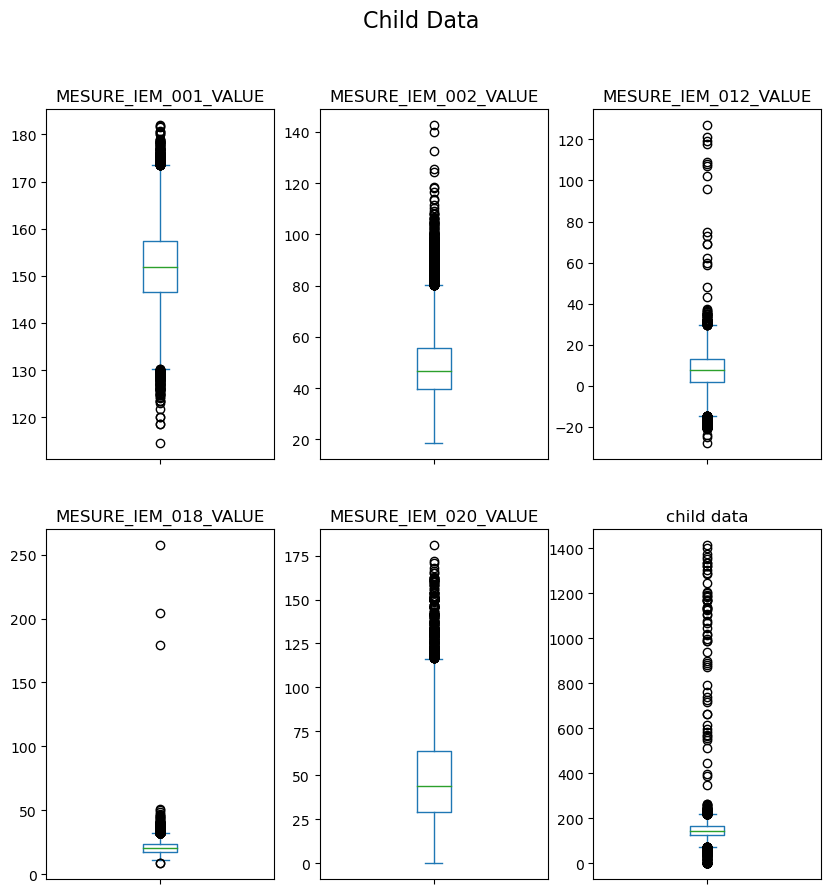

In [27]:
# 유소년 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_child.columns[6:12]):
    ax = axes[i // 3, i % 3]
    data_child[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Child Data', fontsize=16)

# 레이아웃 조정
plt.title('child data')
plt.show()

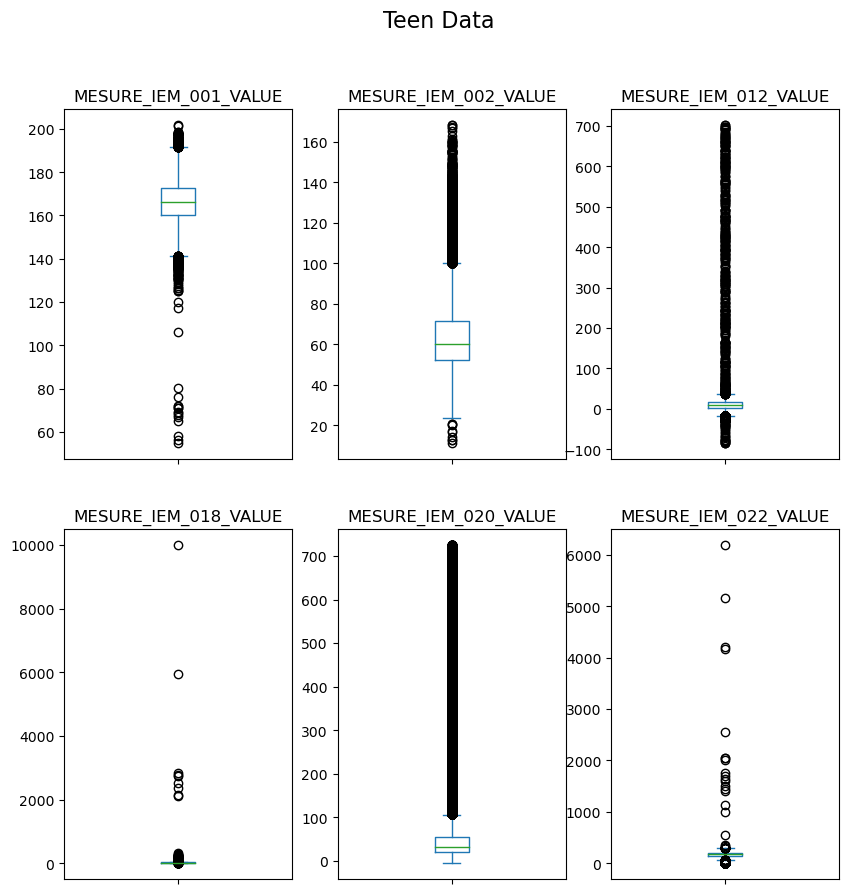

In [28]:
# 청소년(teen) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_teen.columns[6:12]):
    ax = axes[i // 3, i % 3]
    data_teen[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Teen Data', fontsize=16)
plt.show()

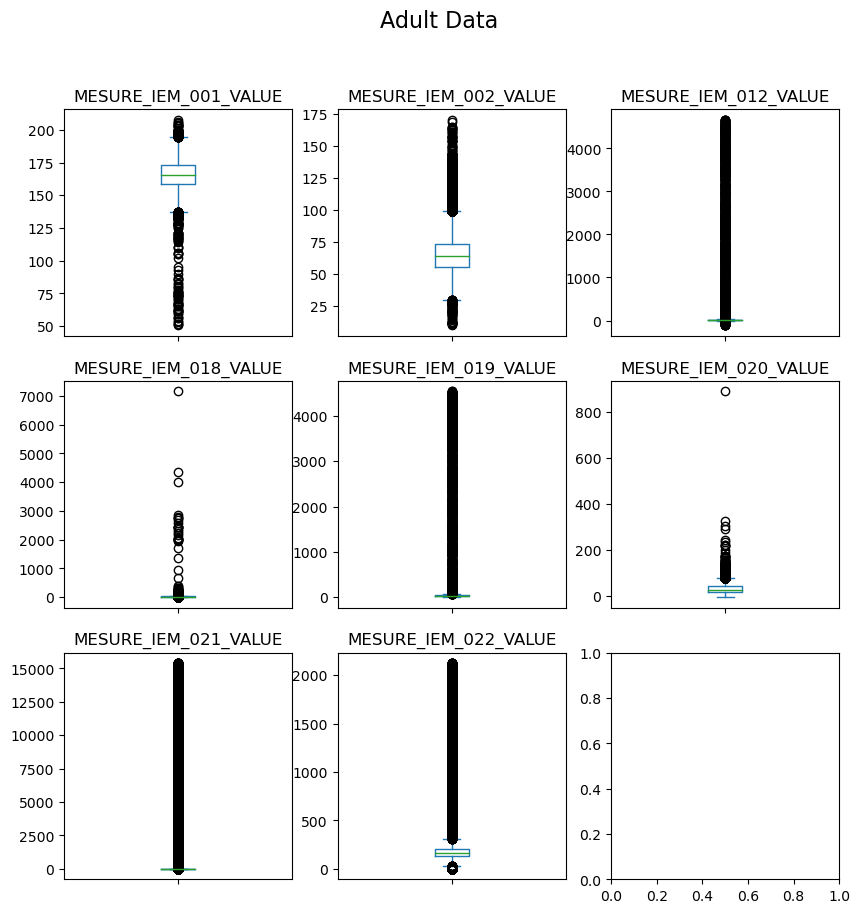

In [29]:
# 성인(adult) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_adult.columns[6:14]):
    ax = axes[i // 3, i % 3]
    data_adult[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Adult Data', fontsize=16)
plt.show()

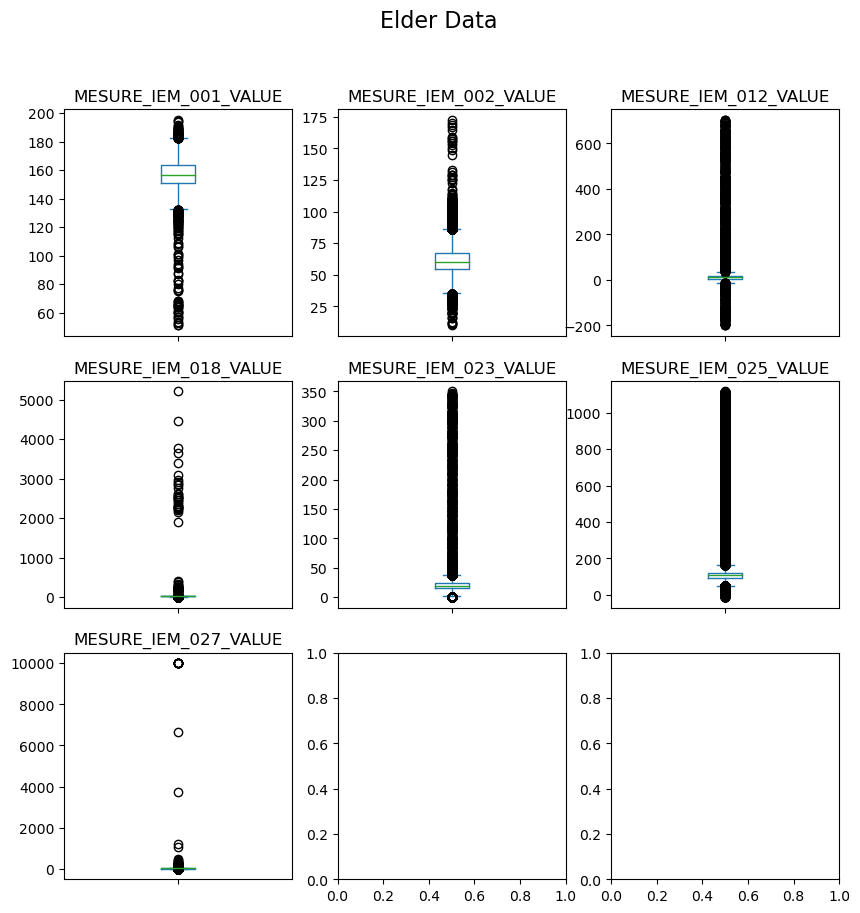

In [30]:
# 노인(elder) 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_elder.columns[6:13]):
    ax = axes[i // 3, i % 3]
    data_elder[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Elder Data', fontsize=16)
plt.show()

###  IQR을 활용한 이상치 체거

In [31]:
# IQR 기준 이상치 제거 함수
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)  # 1사분위수
    q3 = df[column].quantile(0.75)  # 3사분위수
    iqr = q3 - q1  # IQR 계산
    lower_bound = q1 - 1.5 * iqr  # 하위 이상치 제거 기준
    upper_bound = q3 + 1.5 * iqr  # 상위 이상치 제거 기준
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # 이상치 제거
    return df_filtered

In [32]:
# 유소년 데이터 이상치 제거

# 상관도 분석하기
col_list = data_child.columns[6:12].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_child[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.648585,-0.026433,0.278250,-0.045420,0.115165,0.048936
MESURE_IEM_002_VALUE,0.648585,1.000000,-0.079137,0.849276,-0.309397,-0.058810,0.246758
MESURE_IEM_012_VALUE,-0.026433,-0.079137,1.000000,-0.077001,0.084664,0.079202,-0.335481
MESURE_IEM_018_VALUE,0.278250,0.849276,-0.077001,1.000000,-0.339502,-0.122611,0.266041
MESURE_IEM_020_VALUE,-0.045420,-0.309397,0.084664,-0.339502,1.000000,0.293026,-0.521961
MESURE_IEM_022_VALUE,0.115165,-0.058810,0.079202,-0.122611,0.293026,1.000000,-0.194357
CRTFC_FLAG_NM,0.048936,0.246758,-0.335481,0.266041,-0.521961,-0.194357,1.000000


In [33]:
# 유소년 데이터를 iqr로 이상치 제거하기
# iem_020의 이상치 제거
data_child_outlier = remove_outliers(data_child, 'MESURE_IEM_020_VALUE')
# # iem_012의 이상치 제거
data_child_outlier = remove_outliers(data_child_outlier, 'MESURE_IEM_012_VALUE')
# # iem_018의 이상치 제거
data_child_outlier = remove_outliers(data_child_outlier, 'MESURE_IEM_018_VALUE')
# # iem_002의 이상치 제거
data_child_outlier = remove_outliers(data_child_outlier, 'MESURE_IEM_002_VALUE')
# # iem_022의 이상치 제거
data_child_outlier = remove_outliers(data_child_outlier, 'MESURE_IEM_022_VALUE')
# # iem_001의 이상치 제거
data_child_outlier = remove_outliers(data_child_outlier, 'MESURE_IEM_001_VALUE')


# 결과 출력
print("기존데이터")
print(data_child.shape)
print("\noutlier 제거 후")
print(data_child_outlier.shape)

기존데이터
(33509, 13)

outlier 제거 후
(31378, 13)


In [34]:
# 상관도 재확인하기
col_list = data_child.columns[6:12].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_child[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.648585,-0.026433,0.278250,-0.045420,0.115165,0.048936
MESURE_IEM_002_VALUE,0.648585,1.000000,-0.079137,0.849276,-0.309397,-0.058810,0.246758
MESURE_IEM_012_VALUE,-0.026433,-0.079137,1.000000,-0.077001,0.084664,0.079202,-0.335481
MESURE_IEM_018_VALUE,0.278250,0.849276,-0.077001,1.000000,-0.339502,-0.122611,0.266041
MESURE_IEM_020_VALUE,-0.045420,-0.309397,0.084664,-0.339502,1.000000,0.293026,-0.521961
MESURE_IEM_022_VALUE,0.115165,-0.058810,0.079202,-0.122611,0.293026,1.000000,-0.194357
CRTFC_FLAG_NM,0.048936,0.246758,-0.335481,0.266041,-0.521961,-0.194357,1.000000


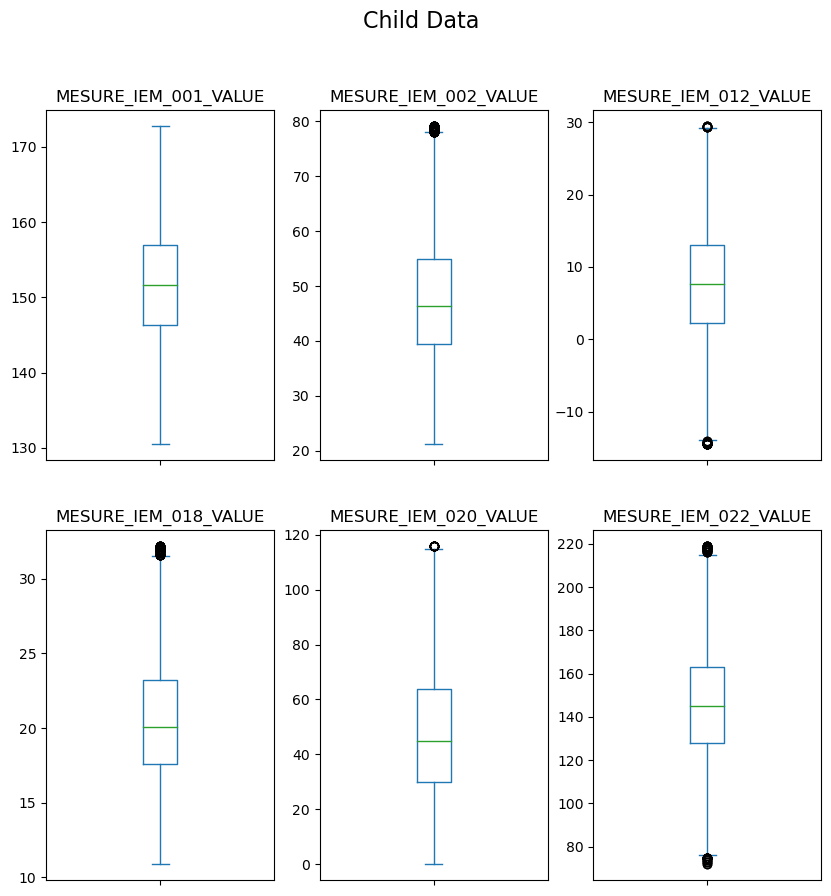

In [35]:
# 유소년 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_child_outlier.columns[6:12]):
    ax = axes[i // 3, i % 3]
    data_child_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Child Data', fontsize=16)
plt.show()

In [36]:
# 청소년 데이터 이상치 제거

# 상관도 분석하기
col_list = data_teen.columns[6:12].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_teen[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.574427,-0.090398,0.021666,0.029456,0.456619,-0.006578
MESURE_IEM_002_VALUE,0.574427,1.000000,-0.049020,0.156183,0.001058,0.109233,0.205187
MESURE_IEM_012_VALUE,-0.090398,-0.049020,1.000000,0.027513,0.022135,0.006654,-0.197113
MESURE_IEM_018_VALUE,0.021666,0.156183,0.027513,1.000000,0.001341,-0.016361,0.042836
MESURE_IEM_020_VALUE,0.029456,0.001058,0.022135,0.001341,1.000000,0.048582,-0.026825
MESURE_IEM_022_VALUE,0.456619,0.109233,0.006654,-0.016361,0.048582,1.000000,-0.272790
CRTFC_FLAG_NM,-0.006578,0.205187,-0.197113,0.042836,-0.026825,-0.272790,1.000000


In [37]:
# 청소년 데이터를 iqr로 이상치 제거하기
# iem_022의 이상치 제거
data_teen_outlier = remove_outliers(data_teen, 'MESURE_IEM_022_VALUE')
# iem_002의 이상치 제거
data_teen_outlier = remove_outliers(data_teen_outlier, 'MESURE_IEM_002_VALUE')
# iem_012의 이상치 제거
data_teen_outlier = remove_outliers(data_teen_outlier, 'MESURE_IEM_012_VALUE')
# iem_018의 이상치 제거
data_teen_outlier = remove_outliers(data_teen_outlier, 'MESURE_IEM_018_VALUE')
# iem_020의 이상치 제거
data_teen_outlier = remove_outliers(data_teen_outlier, 'MESURE_IEM_020_VALUE')
# iem_001의 이상치 제거
data_teen_outlier = remove_outliers(data_teen_outlier, 'MESURE_IEM_001_VALUE')


# 결과 출력
print("기존데이터")
print(data_teen.shape)
print("\noutlier 제거 후")
print(data_teen_outlier.shape)

기존데이터
(235751, 13)

outlier 제거 후
(201459, 13)


In [38]:
# 청소년 상관도 재확인
col_list = data_teen.columns[6:12].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_teen[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.574427,-0.090398,0.021666,0.029456,0.456619,-0.006578
MESURE_IEM_002_VALUE,0.574427,1.000000,-0.049020,0.156183,0.001058,0.109233,0.205187
MESURE_IEM_012_VALUE,-0.090398,-0.049020,1.000000,0.027513,0.022135,0.006654,-0.197113
MESURE_IEM_018_VALUE,0.021666,0.156183,0.027513,1.000000,0.001341,-0.016361,0.042836
MESURE_IEM_020_VALUE,0.029456,0.001058,0.022135,0.001341,1.000000,0.048582,-0.026825
MESURE_IEM_022_VALUE,0.456619,0.109233,0.006654,-0.016361,0.048582,1.000000,-0.272790
CRTFC_FLAG_NM,-0.006578,0.205187,-0.197113,0.042836,-0.026825,-0.272790,1.000000


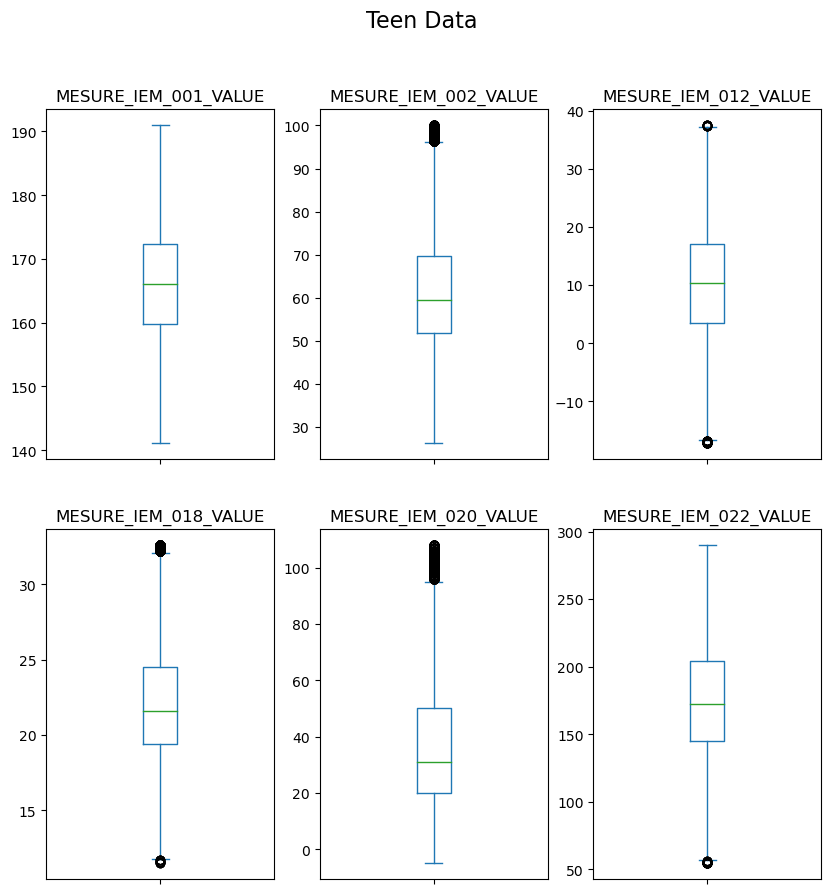

In [39]:
# 청소년 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_teen_outlier.columns[6:12]):
    ax = axes[i // 3, i % 3]
    data_teen_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Teen Data', fontsize=16)
plt.show()

In [40]:
# 성인 데이터 이상치 제거

# 상관도 분석하기
col_list = data_adult.columns[6:14].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_adult[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_019_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_021_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_019_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_021_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.657494,-0.009857,-0.009835,0.071448,0.526344,0.061734,0.319322,-0.022084
MESURE_IEM_002_VALUE,0.657494,1.000000,-0.009976,0.123869,0.045670,0.249328,0.061168,0.195649,0.138707
MESURE_IEM_012_VALUE,-0.009857,-0.009976,1.000000,-0.000792,0.066788,0.000449,0.007401,0.014980,-0.007534
MESURE_IEM_018_VALUE,-0.009835,0.123869,-0.000792,1.000000,0.000255,-0.012124,0.003703,0.001329,0.033350
MESURE_IEM_019_VALUE,0.071448,0.045670,0.066788,0.000255,1.000000,0.078742,0.051396,0.134726,-0.023775
MESURE_IEM_020_VALUE,0.526344,0.249328,0.000449,-0.012124,0.078742,1.000000,0.059344,0.328933,-0.388780
MESURE_IEM_021_VALUE,0.061734,0.061168,0.007401,0.003703,0.051396,0.059344,1.000000,0.258152,-0.029390
MESURE_IEM_022_VALUE,0.319322,0.195649,0.014980,0.001329,0.134726,0.328933,0.258152,1.000000,-0.115123
CRTFC_FLAG_NM,-0.022084,0.138707,-0.007534,0.033350,-0.023775,-0.388780,-0.029390,-0.115123,1.000000


In [41]:
# 성인 데이터를 iqr로 이상치 제거하기
# iem_020의 이상치 제거
data_adult_outlier = remove_outliers(data_adult, 'MESURE_IEM_020_VALUE')
# iem_002의 이상치 제거
data_adult_outlier = remove_outliers(data_adult_outlier, 'MESURE_IEM_002_VALUE')
# iem_022의 이상치 제거
data_adult_outlier = remove_outliers(data_adult_outlier, 'MESURE_IEM_022_VALUE')
# iem_018의 이상치 제거
data_adult_outlier = remove_outliers(data_adult_outlier, 'MESURE_IEM_018_VALUE')
# iem_021의 이상치 제거
data_adult_outlier = remove_outliers(data_adult_outlier, 'MESURE_IEM_021_VALUE')
# iem_019의 이상치 제거
data_adult_outlier = remove_outliers(data_adult_outlier, 'MESURE_IEM_019_VALUE')
# iem_001의 이상치 제거
data_adult_outlier = remove_outliers(data_adult_outlier, 'MESURE_IEM_001_VALUE')
# iem_012의 이상치 제거
data_adult_outlier = remove_outliers(data_adult_outlier, 'MESURE_IEM_012_VALUE')


# 결과 출력
print("기존데이터")
print(data_adult.shape)
print("\noutlier 제거 후")
print(data_adult_outlier.shape)

기존데이터
(423716, 15)

outlier 제거 후
(377502, 15)


In [42]:
# 성인 상관도 확인하기
col_list = data_adult.columns[6:14].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_adult[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_019_VALUE', 'MESURE_IEM_020_VALUE', 'MESURE_IEM_021_VALUE', 'MESURE_IEM_022_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_019_VALUE,MESURE_IEM_020_VALUE,MESURE_IEM_021_VALUE,MESURE_IEM_022_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.657494,-0.009857,-0.009835,0.071448,0.526344,0.061734,0.319322,-0.022084
MESURE_IEM_002_VALUE,0.657494,1.000000,-0.009976,0.123869,0.045670,0.249328,0.061168,0.195649,0.138707
MESURE_IEM_012_VALUE,-0.009857,-0.009976,1.000000,-0.000792,0.066788,0.000449,0.007401,0.014980,-0.007534
MESURE_IEM_018_VALUE,-0.009835,0.123869,-0.000792,1.000000,0.000255,-0.012124,0.003703,0.001329,0.033350
MESURE_IEM_019_VALUE,0.071448,0.045670,0.066788,0.000255,1.000000,0.078742,0.051396,0.134726,-0.023775
MESURE_IEM_020_VALUE,0.526344,0.249328,0.000449,-0.012124,0.078742,1.000000,0.059344,0.328933,-0.388780
MESURE_IEM_021_VALUE,0.061734,0.061168,0.007401,0.003703,0.051396,0.059344,1.000000,0.258152,-0.029390
MESURE_IEM_022_VALUE,0.319322,0.195649,0.014980,0.001329,0.134726,0.328933,0.258152,1.000000,-0.115123
CRTFC_FLAG_NM,-0.022084,0.138707,-0.007534,0.033350,-0.023775,-0.388780,-0.029390,-0.115123,1.000000


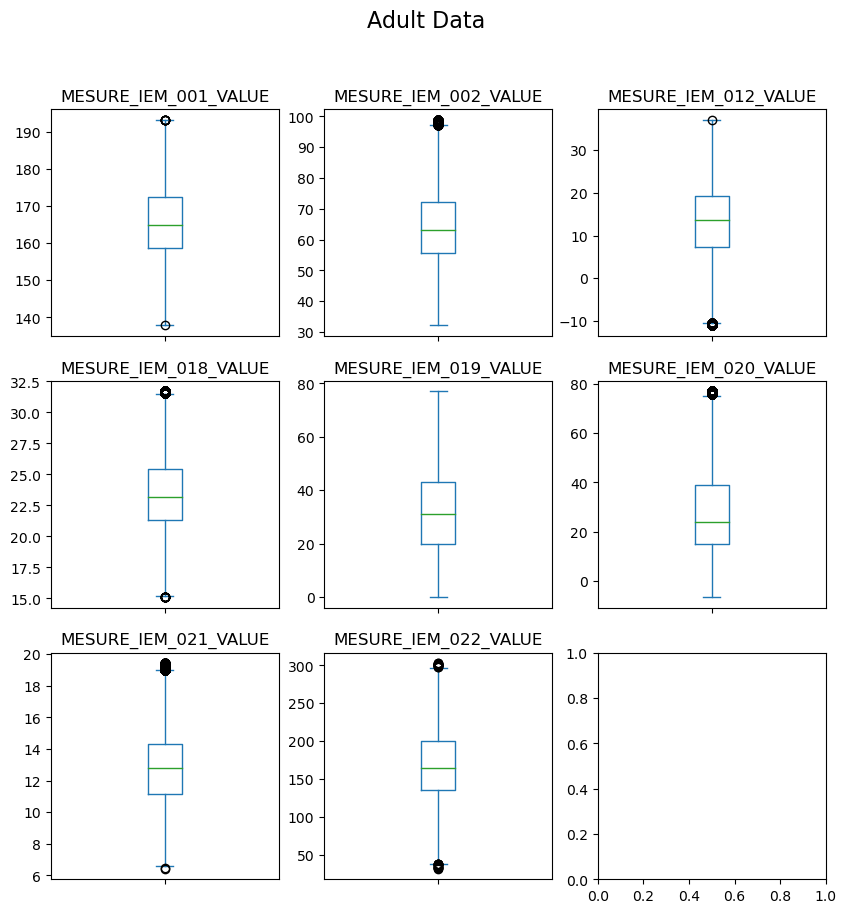

In [43]:
# 성인 데이터 기준 박스플롯
# 그림 초기화
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_adult_outlier.columns[6:14]):
    ax = axes[i // 3, i % 3]
    data_adult_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Adult Data', fontsize=16)
plt.show()

In [44]:
# 노인 데이터 이상치 제거

# 상관도 분석하기
col_list = data_elder.columns[6:13].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_elder[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_023_VALUE', 'MESURE_IEM_025_VALUE', 'MESURE_IEM_027_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_023_VALUE,MESURE_IEM_025_VALUE,MESURE_IEM_027_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.614664,-0.126943,-0.043856,0.098717,0.031619,-0.029148,-0.060178
MESURE_IEM_002_VALUE,0.614664,1.000000,-0.098741,0.075738,0.028823,-0.005502,-0.012398,0.109530
MESURE_IEM_012_VALUE,-0.126943,-0.098741,1.000000,-0.003504,0.096956,0.040049,-0.008154,-0.175859
MESURE_IEM_018_VALUE,-0.043856,0.075738,-0.003504,1.000000,-0.008609,-0.005572,0.001506,0.023279
MESURE_IEM_023_VALUE,0.098717,0.028823,0.096956,-0.008609,1.000000,0.144104,-0.034176,-0.264654
MESURE_IEM_025_VALUE,0.031619,-0.005502,0.040049,-0.005572,0.144104,1.000000,-0.020234,-0.109820
MESURE_IEM_027_VALUE,-0.029148,-0.012398,-0.008154,0.001506,-0.034176,-0.020234,1.000000,0.050635
CRTFC_FLAG_NM,-0.060178,0.109530,-0.175859,0.023279,-0.264654,-0.109820,0.050635,1.000000


In [45]:
# 노인데이터를 iem_023, iem_025을 기준으로 iqr로 이상치 제거하기
#iem_023의 이상치 제거
data_elder_outlier = remove_outliers(data_elder, 'MESURE_IEM_023_VALUE')

col_list = ['MESURE_IEM_025_VALUE','MESURE_IEM_027_VALUE','MESURE_IEM_012_VALUE',
            'MESURE_IEM_002_VALUE','MESURE_IEM_001_VALUE','MESURE_IEM_018_VALUE']
#나머지 열 상관도 순서대로 이상치 제거
for col in col_list:
    data_elder_outlier = remove_outliers(data_elder_outlier, col)

# 결과 출력
print("기존데이터")
print(data_elder.shape)
print("\noutlier 제거 후")
print(data_elder_outlier.shape)

기존데이터
(237170, 14)

outlier 제거 후
(197272, 14)


In [46]:
# 상관도 확인하기
col_list = data_elder.columns[6:13].tolist()
col_list.append('CRTFC_FLAG_NM')

print(col_list)
data_elder[col_list].corr()

['MESURE_IEM_001_VALUE', 'MESURE_IEM_002_VALUE', 'MESURE_IEM_012_VALUE', 'MESURE_IEM_018_VALUE', 'MESURE_IEM_023_VALUE', 'MESURE_IEM_025_VALUE', 'MESURE_IEM_027_VALUE', 'CRTFC_FLAG_NM']


,MESURE_IEM_001_VALUE,MESURE_IEM_002_VALUE,MESURE_IEM_012_VALUE,MESURE_IEM_018_VALUE,MESURE_IEM_023_VALUE,MESURE_IEM_025_VALUE,MESURE_IEM_027_VALUE,CRTFC_FLAG_NM
MESURE_IEM_001_VALUE,1.000000,0.614664,-0.126943,-0.043856,0.098717,0.031619,-0.029148,-0.060178
MESURE_IEM_002_VALUE,0.614664,1.000000,-0.098741,0.075738,0.028823,-0.005502,-0.012398,0.109530
MESURE_IEM_012_VALUE,-0.126943,-0.098741,1.000000,-0.003504,0.096956,0.040049,-0.008154,-0.175859
MESURE_IEM_018_VALUE,-0.043856,0.075738,-0.003504,1.000000,-0.008609,-0.005572,0.001506,0.023279
MESURE_IEM_023_VALUE,0.098717,0.028823,0.096956,-0.008609,1.000000,0.144104,-0.034176,-0.264654
MESURE_IEM_025_VALUE,0.031619,-0.005502,0.040049,-0.005572,0.144104,1.000000,-0.020234,-0.109820
MESURE_IEM_027_VALUE,-0.029148,-0.012398,-0.008154,0.001506,-0.034176,-0.020234,1.000000,0.050635
CRTFC_FLAG_NM,-0.060178,0.109530,-0.175859,0.023279,-0.264654,-0.109820,0.050635,1.000000


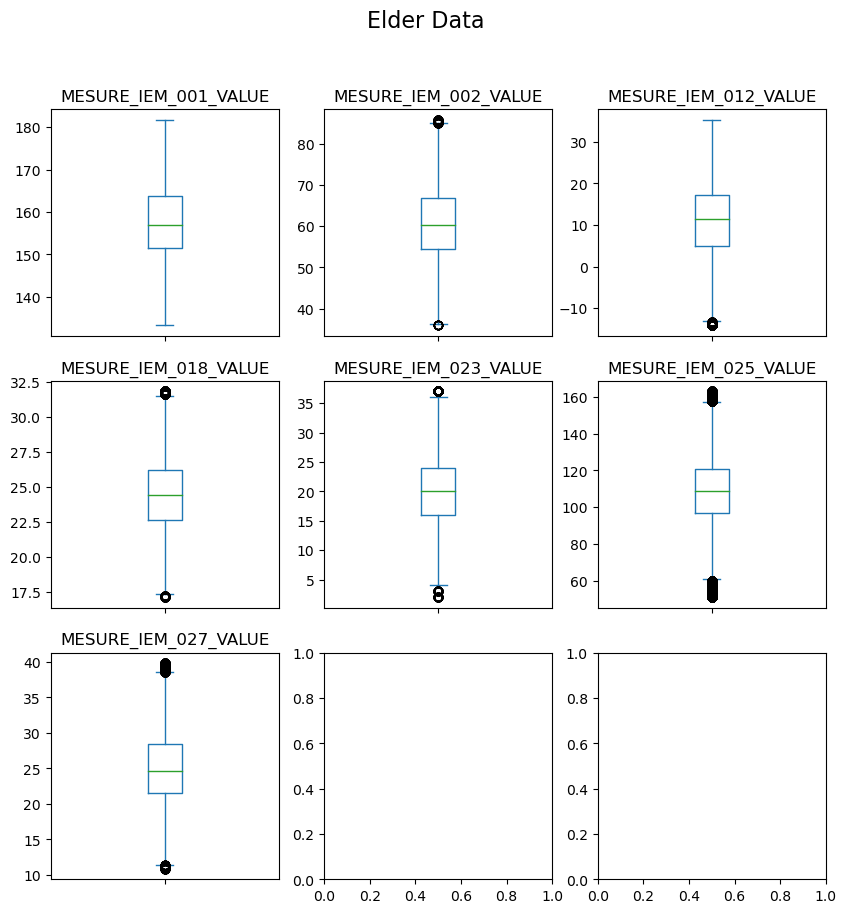

In [47]:
# 노인(elder) 데이터 기준 박스플롯
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# 모든 열에 대해 박스플롯 그리기
for i, column in enumerate(data_elder_outlier.columns[6:13]):
    ax = axes[i // 3, i % 3]
    data_elder_outlier[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_xticklabels([])  # x축 레이블 제거

plt.suptitle('Elder Data', fontsize=16)
plt.show()

In [96]:
# 전처리 된 파일 내보내기 

# data_child_outlier.to_csv('./data_child_final.csv')
# data_teen_outlier.to_csv('./data_teen_final.csv')
# data_adult_outlier.to_csv('./data_adult_final.csv')
# data_elder_outlier.to_csv('./data_elder_final.csv')

# data_child_outlier.to_excel('./data_child_final.xlsx')
# data_teen_outlier.to_excel('./data_teen_final.xlsx')
# data_adult_outlier.to_excel('./data_adult_final.xlsx')
# data_elder_outlier.to_excel('./data_elder_final.xlsx')